In [11]:
import hdf5storage
import numpy as np
import cv2
import time
import matplotlib.pylab as plt
from scipy import misc
import torch
from data import dataPreprocessing
from fixation_extraction import FixationLoader
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#construct and initialize
data = dataPreprocessing()

#divide dataset into training and test and validation equall between animal, human and manmade videos
data.divide_classes()

#check initialization
data.all_train_videos.shape

93 31 32
156 52 52
73 24 25


(0, 112, 112, 3)

In [4]:
tic = time.clock()
data.read_train()
toc= time.clock()
print(toc-tic)

human_cycling02 150
human_painting02 276
human_interview16 1424
human_violin06 1772
human_interview12 2132
human_dancing04 2432
human_cosplay03 2732
human_talking12 3332
human_swimming02 3612
human_kissing02 3729
human_interview08 4250
human_singing02 5151
human_meeting01 5751
human_nodding02 6051
human_walking03 6202
human_shock01 6352
human_gymnastics11 7728
human_interview17 8208
human_introduction03 8478
human_talking18 9049
human_gymnastics15 9300
human_tongue02 9539
human_taiji01 10438
human_talking23 10770
human_thinking01 11028
human_gymnastics09 11703
human_broadcast01 12308
human_performance09 12577
human_discus01 12765
human_violin05 13521
human_fencing01 13643
human_diving01 13829
human_flip02 13984
human_speech01 14566
human_performance06 15414
human_smile02 15623
human_trumpet04 16016
human_trumpet02 16241
human_dancing03 16457
human_nodding01 16583
human_chatting15 16702
human_chatting01 17195
human_cheers01 17338
human_dancing10 17787
human_talking03 18138
human_talking

animal_lion01
animal_penguin12
animal_cat01
animal_penguin11
animal_jellyfish02
animal_polarbear04
animal_hippo01
animal_penguin06
animal_owl01
animal_husky01
animal_chimpanzee05
animal_fox02
animal_whitetiger02
animal_penguin08
animal_giraffe03
animal_alpaca01
animal_elephant02
animal_wolf04
animal_rabbit04
animal_panda01
animal_panda05
animal_rabbit01
animal_penguin13
animal_bird13
animal_elephant03
animal_bird07
animal_polarbear06
animal_penguin07
animal_bird08
animal_polarbear02
animal_cat02
animal_bird12
animal_blackbear03
animal_rabbit02
animal_elephant01
animal_snake01
animal_goat01
animal_goose01
animal_bird11
animal_parrot02
animal_hermitcrab02
animal_bear05
animal_eagle04
animal_parrot01
animal_panda08
animal_wolf03
animal_crab02
animal_panda03
animal_puppy01
animal_wolf02
animal_giraffe06
animal_blackbear01
animal_hawk01
animal_tiger01
animal_giraffe08
animal_tortoise01
animal_panda04
animal_dog01
animal_penguin01
animal_fawn01
animal_bear02
animal_giraffe02
animal_bird14
an

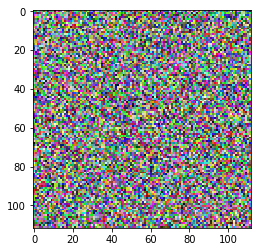

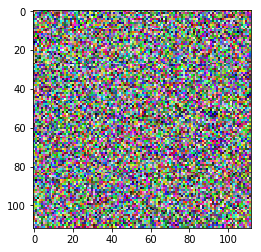

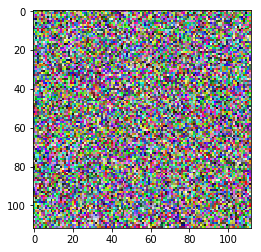

In [5]:
data.calculate_mean_and_std()

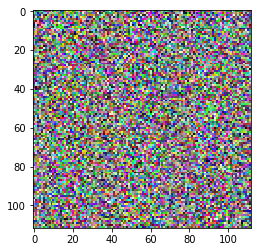

In [15]:
import matplotlib.pylab
matplotlib.pylab.imshow(data.std)
matplotlib.pylab.show()

In [6]:
print("mean", data.mean)

mean [[[103.49072867 105.26212905 106.68308076]
  [106.89455263 108.99212496 110.77129799]
  [105.64925345 108.33475444 110.19873776]
  ...
  [104.52041367 105.85704844 108.37703392]
  [105.49596939 106.7080277  108.26571285]
  [101.54843244 102.54044569 103.53763451]]

 [[105.62048069 107.7346688  109.3236214 ]
  [109.1000391  111.57921585 113.5122873 ]
  [108.57377034 111.6729065  113.83491269]
  ...
  [106.799475   108.11839558 110.8144804 ]
  [107.71537216 108.95382954 110.57971851]
  [103.45548647 104.35149123 105.97322858]]

 [[105.39670291 107.57215996 109.38566296]
  [109.24166884 111.96212347 114.36416018]
  [109.87876531 113.04305209 115.39009383]
  ...
  [107.46471125 108.66296496 111.34882898]
  [107.45358752 108.64203932 110.41690248]
  [103.06921845 103.88798079 105.89698216]]

 ...

 [[ 95.59890345  98.74141751 106.52710653]
  [ 97.43114458 101.07310943 109.44549838]
  [ 98.09836356 101.77248948 110.14110846]
  ...
  [ 95.91047027 100.74745876 109.42177086]
  [ 96.177588

In [7]:
print("std",data.std)

std [[[127.99923241 127.29068166 128.04658799]
  [131.57138376 131.11097314 132.22466554]
  [130.02523034 130.13783003 131.54271854]
  ...
  [130.81886228 129.8846229  130.76558697]
  [131.40346846 130.19593337 130.66781257]
  [127.43311724 126.05807772 125.82456562]]

 [[130.60756209 130.27180185 131.19908126]
  [134.17113953 134.36863709 135.66525543]
  [133.14813826 134.02275194 135.60715951]
  ...
  [133.54741542 132.57557628 133.70954747]
  [134.14767195 132.9153988  133.47387675]
  [129.775278   128.41214972 128.57205113]]

 [[130.29956906 129.89197539 131.11986571]
  [134.19621472 134.56673492 136.50916187]
  [134.7213587  135.52688949 137.27575946]
  ...
  [133.53748198 132.45253523 133.79357679]
  [133.63915261 132.44387046 132.94959208]
  [129.59407936 128.19048587 128.40027804]]

 ...

 [[114.15135421 115.92690381 123.38270321]
  [116.68399979 118.95477691 126.92866041]
  [117.01549399 119.3364063  127.30416969]
  ...
  [115.45700293 119.32702174 127.53292546]
  [115.6848113

In [13]:
tic=time.clock()
data.save_all()
toc=time.clock()
print(toc-tic)

Saving trainSet : 92.38473299999987
Reading & Saving testSet : 872.8956039999998
Reading & Saving validSet : 803.0557700000004
1768.3496520000003


In [17]:
#testing the saved info
test=np.load('TestSet/animal_bear03.npy')
print(test.shape)
print(test[0])

test_fix=np.load('TestSet/FixData/animal_bear03.npy')
print(test_fix.shape)


(396, 112, 112, 3)
[[[-0.25383534 -0.00205929 -0.2318147 ]
  [-0.44762433 -0.1601096  -0.38397751]
  [-0.52796871 -0.20236049 -0.44243223]
  ...
  [-0.52378084 -0.26836932 -0.3240687 ]
  [-0.55170514 -0.31266743 -0.36172422]
  [-0.55361145 -0.37713129 -0.40959915]]

 [[-0.36460738 -0.12845964 -0.34545685]
  [-0.50010784 -0.22013482 -0.44604116]
  [-0.54506035 -0.20647917 -0.44861136]
  ...
  [-0.48521699 -0.2422648  -0.28281062]
  [-0.51969126 -0.29307236 -0.32650373]
  [-0.51208125 -0.34538392 -0.3731233 ]]

 [[-0.47887114 -0.1660777  -0.39952499]
  [-0.53087689 -0.19293121 -0.43487308]
  [-0.59291835 -0.22905456 -0.48362576]
  ...
  [-0.49023473 -0.23905141 -0.28662683]
  [-0.53467555 -0.30686237 -0.34160994]
  [-0.50981664 -0.34236535 -0.3652405 ]]

 ...

 [[ 0.62549496  0.8303386   0.58738293]
  [ 0.42481279  0.67190989  0.421926  ]
  [ 0.70846717  0.93205011  0.69800456]
  ...
  [ 0.43383709  0.6725429   0.4122718 ]
  [ 0.37880869  0.66519296  0.39160867]
  [ 0.41385631  0.6949806